In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Load dataset
df_diabetes = pd.read_csv('diabetes.csv')

In [94]:
# Check for missing values for 0 in columns except for the 'Pregnancies' column and 'Outcome' column and replace them with the mean of the respective column
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)
df_diabetes['DiabetesPedigreeFunction'] = df_diabetes['DiabetesPedigreeFunction'].replace(0, np.nan)
df_diabetes['Age'] = df_diabetes['Age'].replace(0, np.nan)
df_diabetes.fillna(df_diabetes.mean(), inplace=True)

## Testing raw dataset

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Split the data into training and testing sets
X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))


0.69
0.71
0.56


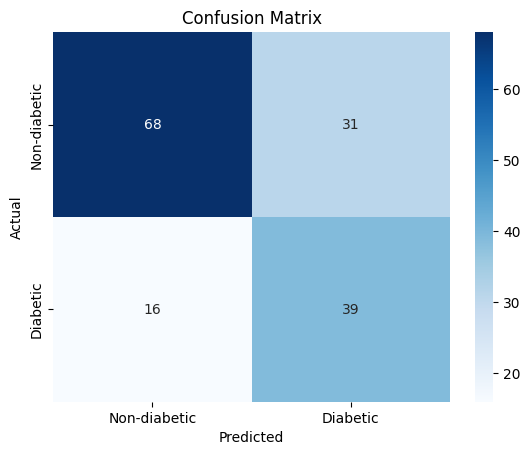

In [96]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_test, y_pred):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'])
    plt.yticks([0.5, 1.5], ['Non-diabetic', 'Diabetic'])
    plt.show()

# Call the function
plot_confusion_matrix(y_test, y_pred)


## Preprocessing
- Remove Pregancies column
- Remove Outcome column

0.68
0.56
0.54


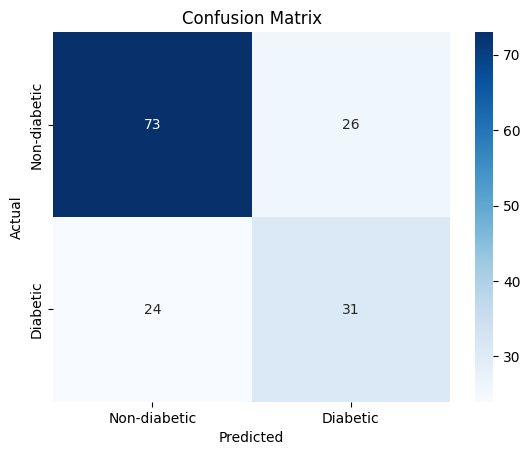

In [97]:
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the neural network
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

plot_confusion_matrix(y_test, y_pred)

0.65
0.6
0.51


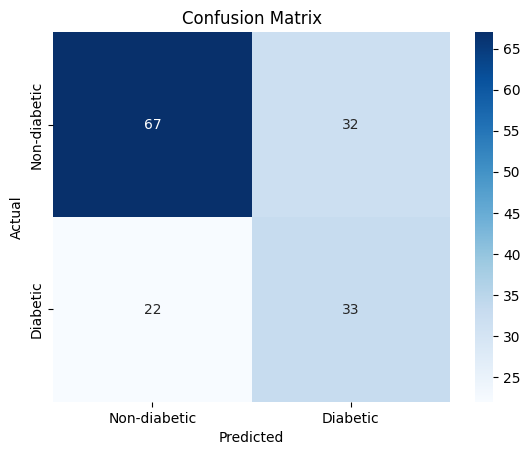

In [98]:
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class (Diabetic examples) using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Train the neural network on the resampled data
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

plot_confusion_matrix(y_test, y_pred)

0.66
0.55
0.52


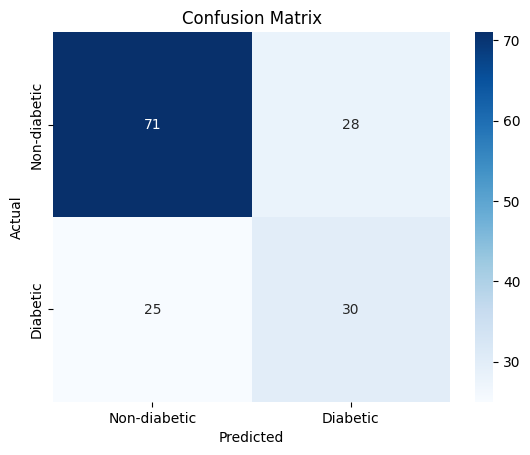

In [99]:
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersample the majority class (Non-Diabetic examples) using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler()
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train the neural network on the resampled data
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_resampled, y_train_resampled)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

plot_confusion_matrix(y_test, y_pred)

In [100]:
# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the neural network with two hidden layers
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), random_state=42)
nn_model.fit(X_train, y_train)

# Test the model and calculate accuracy, recall, and precision
y_pred = nn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

0.69
0.22
0.75


In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Create the randomized search object
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 23, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.71
0.55
0.61


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best hyperparameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': 93, 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.65
0.62
0.51


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


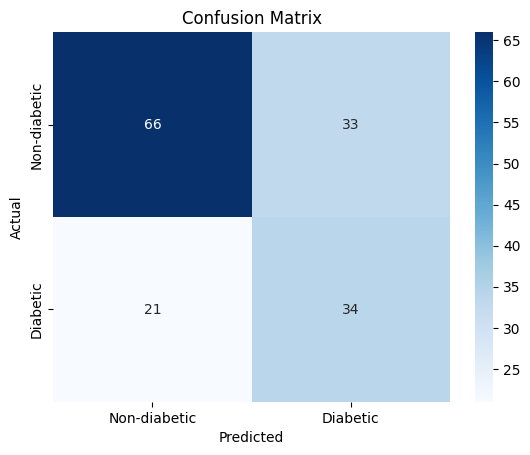

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Split the data into training and testing sets
X = df_diabetes.drop(['Outcome'], axis=1)
y = df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class (Diabetic examples) using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Create the randomized search object
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Test the model and calculate accuracy, recall, and precision
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

plot_confusion_matrix(y_test, y_pred)

Best hyperparameters: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': 66, 'learning_rate': 'invscaling', 'solver': 'lbfgs'}
0.79
0.68
0.58


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


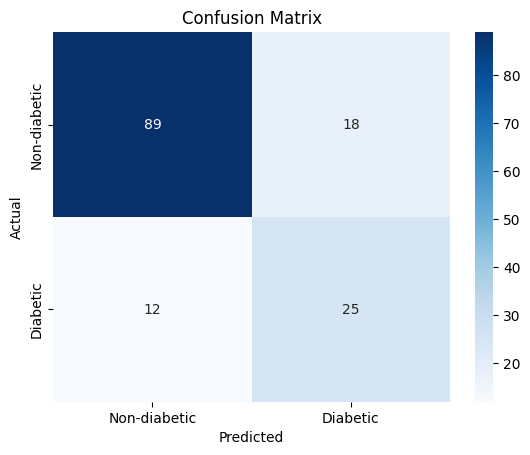

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats

# Calculamos el puntaje Z (la desviación en términos de desviación estándar)
z_scores = np.abs(stats.zscore(df_diabetes))

# Establecemos un umbral para identificar los outliers
threshold = 3

# Obtenemos un arreglo booleano de donde los puntajes Z están fuera del umbral
outliers = (z_scores > threshold).any(axis=1)

# Filtramos los outliers de nuestro DataFrame
df_filtered = df_diabetes[~outliers]

# Ahora podrías separar tu conjunto de datos ya filtrado.
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Create the randomized search object
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

plot_confusion_matrix(y_test, y_pred)

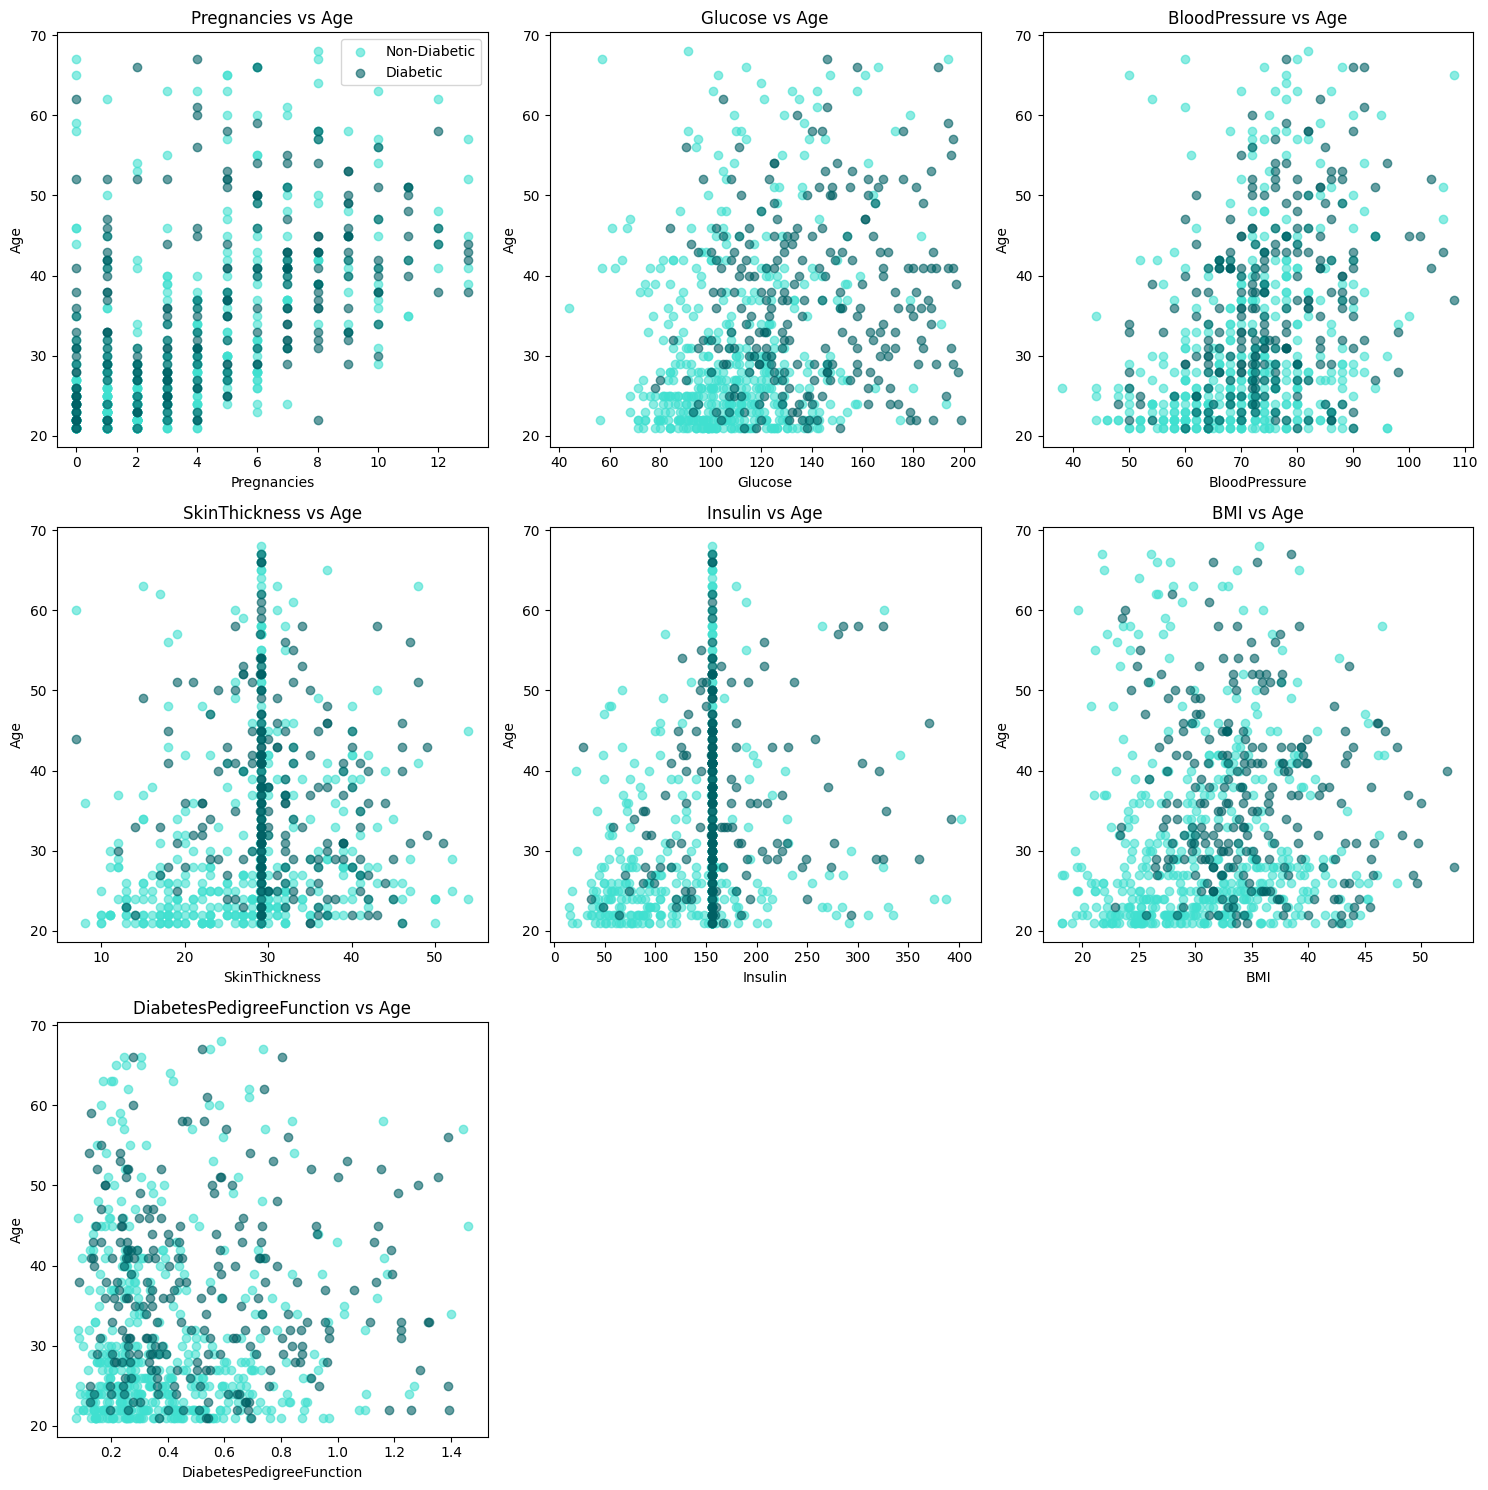

In [104]:
def scatter_plots_grid_by_feature_and_split(df, features, split_column, y_column, labels):
    num_features = len(features)
    colors = ['#40E0D0', '#006064']

    num_rows = (num_features + 2) // 3  

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  
    axes_flattened = axes.flatten() if num_rows > 1 else [axes]

    for i, feature in enumerate(features):
        ax = axes_flattened[i]
        for idx, outcome in enumerate(sorted(df[split_column].unique())):
            subset = df[df[split_column] == outcome]
            ax.scatter(subset[feature], subset[y_column], c=colors[idx], label=labels[idx], alpha=0.6)

        ax.set_title(f'{feature} vs {y_column}')
        ax.set_xlabel(feature)
        ax.set_ylabel(y_column)
        if i == 0:  
            ax.legend()

    for i in range(num_features, num_rows * 3):
        fig.delaxes(axes_flattened[i])

    plt.tight_layout()  
    plt.show()

labels = ['Non-Diabetic', 'Diabetic']
scatter_plots_grid_by_feature_and_split(df_filtered, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'], 'Outcome', 'Age', labels)

Best hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': 79, 'learning_rate': 'invscaling', 'solver': 'adam'}
0.82
0.73
0.63


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


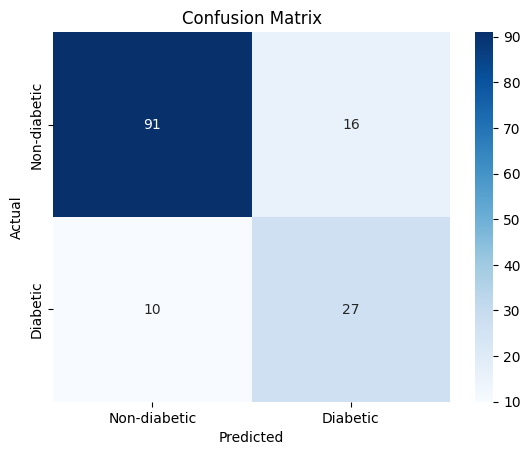

In [112]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Calculate Z-scores and filter outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Split the data into features and target
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Create the preprocessing pipeline
# You can choose either StandardScaler or MinMaxScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Create the randomized search object with the pipeline
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train_std, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

plot_confusion_matrix(y_test, y_pred)

Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 16, 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.79
0.76
0.57


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


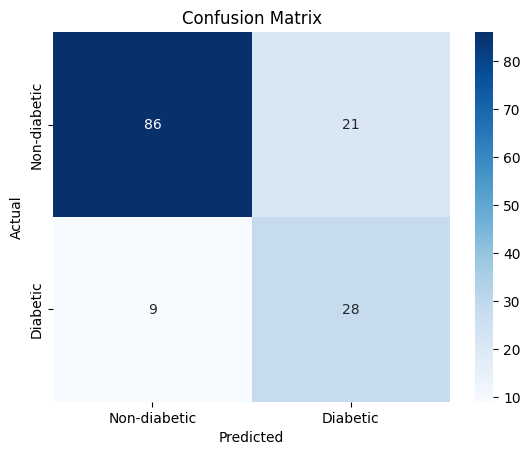

In [117]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Calculate Z-scores and filter outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Split the data into features and target
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Create the preprocessing pipeline
# You can choose either StandardScaler or MinMaxScaler
scaler_std = MinMaxScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

# Create the randomized search object with the pipeline
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train_std, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

plot_confusion_matrix(y_test, y_pred)

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': 84, 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.69
0.51
0.41


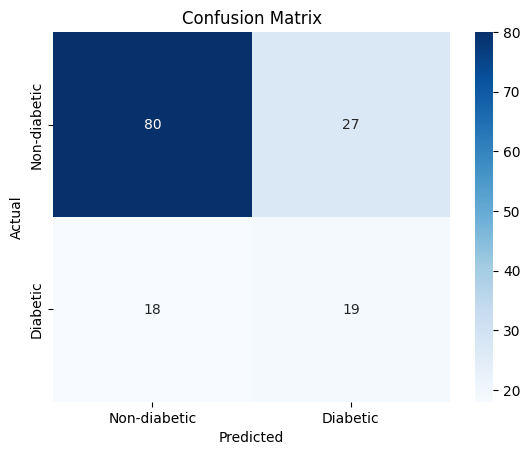

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy import stats
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Calculate Z-scores and filter outliers
z_scores = np.abs(stats.zscore(df_diabetes))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_filtered = df_diabetes[~outliers]

# Split the data into features and target
X = df_filtered.drop(['Outcome', 'Pregnancies'], axis=1)
y = df_filtered['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversample the minority class (Diabetic examples) using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': randint(2, 100),  # Search for 2 to 100 neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers for weight optimization
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive']  # Learning rate schedules
}

# Create the preprocessing pipeline
# You can choose either StandardScaler or MinMaxScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train_resampled)
X_test_std = scaler_std.transform(X_test)

# Create the randomized search object with the pipeline
random_search = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='f1', n_jobs=-1)

# Perform the randomized search
random_search.fit(X_train_std, y_train_resampled)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Evaluate the model with the best hyperparameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(round(accuracy, 2))
print(round(recall, 2))
print(round(precision, 2))

plot_confusion_matrix(y_test, y_pred)